In [1]:
#importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the dataset

In [4]:
data = pd.read_csv('/content/tweet_emotions.csv')

In [5]:
#taking the dataset information

In [6]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [7]:
#information about the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [9]:
data.describe()

,tweet_id
count,4.000000e+04
mean,1.845184e+09
std,1.188579e+08
min,1.693956e+09
25%,1.751431e+09
50%,1.855443e+09
75%,1.962781e+09
max,1.966441e+09


In [10]:
#identifying the types of data in the dataset

In [11]:
data.dtypes

tweet_id      int64
sentiment    object
content      object
dtype: object

In [12]:
#checking for the null values in the dataset

In [13]:
data.isna().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [14]:
#printing the number of columns in the dataset

In [15]:
data.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [16]:
#taking the counts of the content

In [17]:
data['content'].value_counts()

I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9                            14
FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone                                             13
Happy Mother's Day!                                                                                                                     10
Happy Mothers Day                                                                                                                       10
happy mother's day                                                                                                                       8
                                                                                                                                        ..
Sick daddy  send prayer his way                                                                                                          1
Laura's gone for the weeken

In [18]:
#taking the counts of the sentiments in the dataset

In [19]:
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [20]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [21]:
#removing the punctuations

In [22]:
import string

In [23]:
PTR = string.punctuation
def r_pun(text):
  return text.translate(str.maketrans('','',PTR))

data['content'] = data['content'].apply(lambda text :r_pun(text))

In [24]:
data['content']

0        tiffanylue i know  i was listenin to bad habit...
1        Layin n bed with a headache  ughhhhwaitin on y...
2                            Funeral ceremonygloomy friday
3                      wants to hang out with friends SOON
4        dannycastillo We want to trade with someone wh...
                               ...                        
39995                                      JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mothers Day to all the mommies out there...
39998    niariley WASSUP BEAUTIFUL FOLLOW ME  PEEP OUT ...
39999    mopedronin bullet train from tokyo    the gf a...
Name: content, Length: 40000, dtype: object

In [25]:
#lowercasing the data

In [26]:
data['content'] = data['content'].apply(lambda x:x.lower())

In [27]:
data['content']

0        tiffanylue i know  i was listenin to bad habit...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4        dannycastillo we want to trade with someone wh...
                               ...                        
39995                                      johnlloydtaylor
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998    niariley wassup beautiful follow me  peep out ...
39999    mopedronin bullet train from tokyo    the gf a...
Name: content, Length: 40000, dtype: object

In [28]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,tiffanylue i know i was listenin to bad habit...
1,1956967666,sadness,layin n bed with a headache ughhhhwaitin on y...
2,1956967696,sadness,funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends soon
4,1956968416,neutral,dannycastillo we want to trade with someone wh...


In [29]:
#removing stopwords

In [30]:
import nltk

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords

In [33]:
s_list = stopwords.words('english')

In [34]:
data['content']

0        tiffanylue i know  i was listenin to bad habit...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4        dannycastillo we want to trade with someone wh...
                               ...                        
39995                                      johnlloydtaylor
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998    niariley wassup beautiful follow me  peep out ...
39999    mopedronin bullet train from tokyo    the gf a...
Name: content, Length: 40000, dtype: object

In [35]:
data['content'] = data['content'].apply(lambda x: [item for item in x.split() if item not in s_list]).apply(lambda x:" ".join(x))

In [36]:
data['content']

0        tiffanylue know listenin bad habit earlier sta...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                  wants hang friends soon
4        dannycastillo want trade someone houston ticke...
                               ...                        
39995                                      johnlloydtaylor
39996                               happy mothers day love
39997    happy mothers day mommies woman man long youre...
39998    niariley wassup beautiful follow peep new hit ...
39999    mopedronin bullet train tokyo gf visiting japa...
Name: content, Length: 40000, dtype: object

In [37]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
from nltk.stem import WordNetLemmatizer

lemma = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemma.lemmatize(word) for word in text.split()])

data["content"] = data["content"].apply(lambda text: lemmatize_words(text))

In [39]:
data['content']

0        tiffanylue know listenin bad habit earlier sta...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                    want hang friend soon
4        dannycastillo want trade someone houston ticke...
                               ...                        
39995                                      johnlloydtaylor
39996                                happy mother day love
39997    happy mother day mommy woman man long youre mo...
39998    niariley wassup beautiful follow peep new hit ...
39999    mopedronin bullet train tokyo gf visiting japa...
Name: content, Length: 40000, dtype: object

In [40]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,tiffanylue know listenin bad habit earlier sta...
1,1956967666,sadness,layin n bed headache ughhhhwaitin call
2,1956967696,sadness,funeral ceremonygloomy friday
3,1956967789,enthusiasm,want hang friend soon
4,1956968416,neutral,dannycastillo want trade someone houston ticke...


In [41]:
#Feature Extraction

In [42]:
x = data.iloc[:,:]

In [43]:
x.head()

,tweet_id,sentiment,content
0,1956967341,empty,tiffanylue know listenin bad habit earlier sta...
1,1956967666,sadness,layin n bed headache ughhhhwaitin call
2,1956967696,sadness,funeral ceremonygloomy friday
3,1956967789,enthusiasm,want hang friend soon
4,1956968416,neutral,dannycastillo want trade someone houston ticke...


In [44]:
y = data['sentiment']

In [45]:
y.head()

0         empty
1       sadness
2       sadness
3    enthusiasm
4       neutral
Name: sentiment, dtype: object

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test , y_train ,y_test = train_test_split(x,y, test_size=0.2, random_state=142)

In [48]:
x_train

,tweet_id,sentiment,content
11164,1963131227,hate,mad hell someone stole pink amp black leapord ...
14727,1964624766,sadness,way work im hungry
10174,1962841213,sadness,qdakid q dont get love anymore
23366,1694606711,neutral,beverleyknight really ur brave lady walkin aro...
2264,1957506331,enthusiasm,well im going try sleep work 9 tomorrow weeken...
...,...,...,...
34384,1752848991,neutral,davidyoumans happy birthday david
5146,1960630714,sadness,tanning emily bad prob gonna rain
12799,1963728948,happiness,kiieeeee yaaay u cleaning ur room said hi u da...
31131,1751851944,worry,andrewgoldstein 11 30 way early anyway nigth n...


In [51]:
#bag of words

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
cv = CountVectorizer(stop_words='english',min_df =  10, max_df = 200, max_features = 2000)

In [54]:
x_train_bow = cv.fit_transform(x_train['content']).toarray()
x_test_bow = cv.transform(x_test['content']).toarray()

In [56]:
print(cv.vocabulary_)

{'mad': 1086, 'hell': 852, 'pink': 1309, 'black': 218, 'print': 1353, 'wanted': 1880, 'wear': 1894, 'god': 763, 'bless': 223, 'hungry': 903, 'anymore': 112, 'lady': 1006, 'book': 239, 'suggestion': 1672, '23': 18, '24': 19, 'coffee': 399, 'hand': 817, 'outside': 1253, 'sunday': 1678, 'stuck': 1658, 'bye': 299, 'totally': 1777, 'agree': 73, 'everybody': 609, 'close': 387, 'window': 1926, 'bus': 291, 'train': 1787, 'afraid': 69, 'robluketic': 1451, 'voice': 1868, 'youve': 1990, 'started': 1631, 'xo': 1968, 'excited': 619, 'tweeter': 1811, 'bored': 243, 'play': 1319, 'hit': 865, 'fell': 666, 'ugh': 1825, 'paper': 1271, 'blog': 229, 'set': 1524, 'private': 1354, 'change': 339, 'beautiful': 193, 'enjoy': 595, 'sun': 1676, 'ppl': 1343, 'anniversary': 107, 'video': 1864, 'break': 262, 'place': 1313, 'youll': 1985, 'worry': 1953, 'hang': 819, 'rub': 1463, 'seeing': 1508, 'il': 916, 'watched': 1889, 'far': 650, 'dead': 485, 'weather': 1896, 'shame': 1531, '11': 2, 'dinner': 520, 'anyways': 114,

In [58]:
import gensim

In [61]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [59]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [62]:
story = []
for doc in data['content'] :
  raw_sent = sent_tokenize(doc)
  for sent in raw_sent:
    story.append(simple_preprocess(sent))

In [64]:
#the model is being trained

In [63]:
model =  gensim.models.Word2Vec(window=10,min_count=2)
model.build_vocab(story)
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(1244564, 1528245)

In [67]:
#randomforestclassifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf= RandomForestClassifier()

In [74]:
rf.fit(x_train_bow,y_train)

RandomForestClassifier()

In [75]:
y_pred = rf.predict(x_test_bow)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
print('The accuracy score is :',accuracy_score(y_test,y_pred))

The accuracy score is : 0.245


In [ ]:
#logisticregression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr=LogisticRegression()

In [80]:
lr.fit(x_train_bow, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
y_pred = lr.predict(x_test_bow)

In [82]:
print('The accuracy score is :' , accuracy_score(y_test,y_pred))

The accuracy score is : 0.27825


In [83]:
from xgboost import XGBClassifier

In [86]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(x_train_bow, y_train)

In [ ]:
print('The accuracy score is:' , accuracy_score(y_test,y_pred))

In [155]:
#plotting the graph of the accuracy of the models

In [106]:
import matplotlib.pyplot as plt
import numpy as np

In [153]:
models = ['LogisticRegression', 'RandomForestClassifier']
accuracy_scores = [0.27, 0.24]

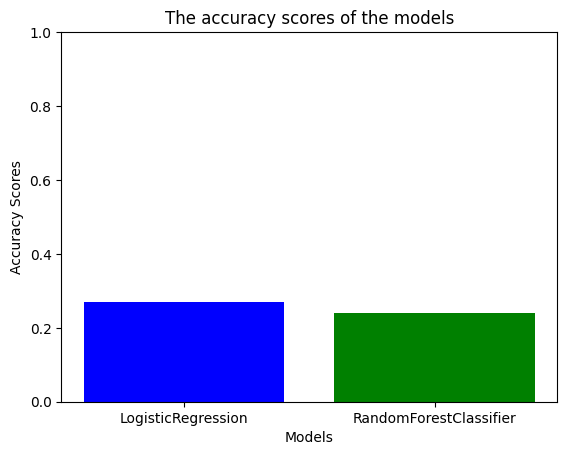

In [154]:
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title("The accuracy scores of the models")
plt.ylim(0, 1)
plt.show()